# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read Data

In [2]:
#importing the dataset into kaggle
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Explorty

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Sex', ylabel='Survived'>

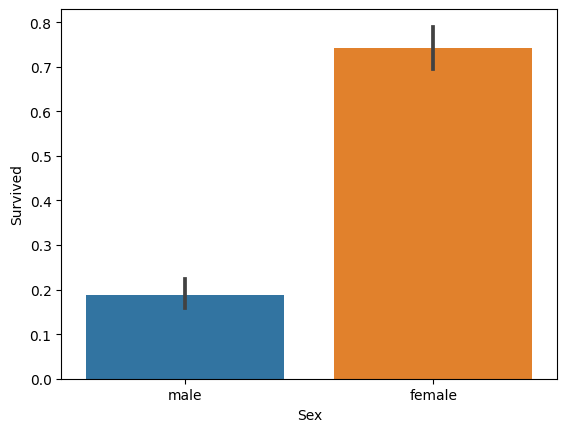

In [7]:
sns.barplot(data=df ,x="Sex" , y="Survived")

<Axes: xlabel='Survived', ylabel='count'>

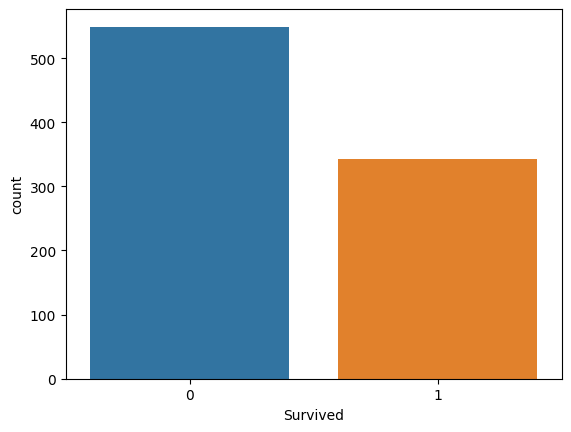

In [8]:
sns.countplot(data=df , x="Survived")

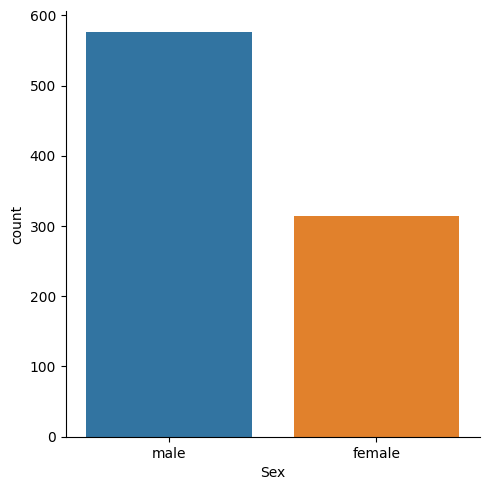

In [9]:
sns.catplot(data=df , x="Sex",kind="count")

# Data Preprocessing

See that the data contains many columns like PassengerId, Name, Age, etc. We won’t be working with all the columns in the dataset, so I am going to be deleting the columns I don’t need

In [10]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

**Hot Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [12]:
newdf=df.to_csv('newdf.csv')

**Splitting**

In [13]:
#splitting the data into x and y
y = df['Survived']
y_1 = df['Survived']
y_2 = df['Survived']
df_1=df
df.drop("Survived",axis=1,inplace=True)

**Null Values**

In [14]:

newdf

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


there are null values in "Age" column

In [16]:
print(df.isnull().sum())


Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


<Axes: >

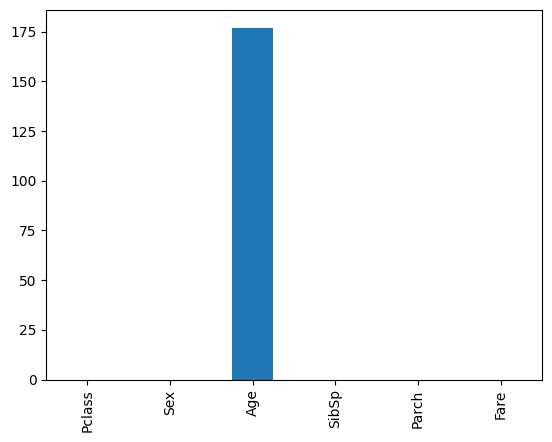

In [17]:
df.isnull().sum().plot(kind="bar")

How can we dealing with Null values ?

**1.** Deleting the column with missing data

In [18]:
updated_df = df.dropna(axis=1)

In [19]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.832089552238806


The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.

**2.** Deleting the row with missing data

In [21]:
df_1.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [22]:
df_1.isna().any()

Pclass    False
Sex       False
Age        True
SibSp     False
Parch     False
Fare      False
dtype: bool

In [23]:
newdf_2=pd.read_csv('/content/newdf.csv')

In [24]:
updated_df = newdf_2.dropna(axis=0)
updated_df=updated_df.drop(['Unnamed: 0'],axis=1)

In [25]:
updated_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [26]:
y1 = updated_df['Survived']
updated_df.drop("Survived",axis=1,inplace=True)

In [27]:
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [28]:
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.786046511627907


We see that deleting rows that contains null not better than drop columns that contain nulls

**3.** Filling the Missing Values – Imputation


In [29]:
newdf_3=pd.read_csv('/content/newdf.csv')
updated_df=newdf_3.drop(['Unnamed: 0'],axis=1)
newdf_3['Age']=newdf_3['Age'].fillna(updated_df['Age'].mean())

In [30]:
newdf_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [31]:
y1 = newdf_3['Survived']
newdf_3.drop("Survived",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(newdf_3,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7947761194029851


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the result still not improve

**4.** Filling with Regression Model

In [32]:
df=pd.read_csv('/content/newdf.csv')

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

<ipython-input-33-09ec5a198886>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Age",axis=1,inplace=True)
<ipython-input-33-09ec5a198886>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Age",axis=1,inplace=True)
<ipython-input-33-09ec5a198886>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Age']= pred


In [34]:
traindf['Age']=y

<ipython-input-34-09294d128ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Age']=y


In [35]:
y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

<ipython-input-35-6639128dc763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Survived",axis=1,inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [37]:
y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)

<ipython-input-37-9b92d9609b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Survived",axis=1,inplace=True)


In [38]:
print(metrics.accuracy_score(pred,y_test))

0.751412429378531


The result become more worest by using regression model to fill null  